In [242]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [243]:
import lxml.html
import requests
from typing import Dict, List
#shift and enter to execute code. Reset Theme once done. 


def coinmarketcap_get_btc(start_date: str, end_date: str) -> List[Dict]:
    # Build the url
    url = f'https://coinmarketcap.com/currencies/bitcoin/historical-data/?start={start_date}&end={end_date}'
    # Make the request and parse the tree
    response = requests.get(url, timeout=5)
    tree = lxml.html.fromstring(response.text)
    # Extract table and raw data
    table = tree.find_class('cmc-table')[0]
    xpath_0, xpath_1 = 'div[3]/div/table/thead/tr', 'div[3]/div/table/tbody/tr/td[%d]/div'
    cols = [_.text_content() for _ in table.xpath(xpath_0 + '/th')]
    dates = (_.text_content() for _ in table.xpath(xpath_1 % 1))
    m = map(lambda d: (float(_.text_content().replace(',', '')) for _ in table.xpath(xpath_1 % d)),
            range(2, 8))
    return [{k: v for k, v in zip(cols, _)} for _ in zip(dates, *m)]

In [244]:
import datetime
now = datetime.datetime.now()
print(now.year, now.month, now.day, now.hour, now.minute, now.second)
day = str(now.day)
if(len(day) < 2):
    day = '0' + day
month = str(now.month)
if(len(month) < 2):
    month = '0' + month
   
currentDate = str(now.year) + month + day
print(currentDate)

2020 5 1 0 42 7
20200501


In [345]:
df = coinmarketcap_get_btc(start_date='20130428', end_date=currentDate)
#THIS WILL BE Constantly be Up to Date, since I grab the current date.


In [246]:
df2 = pd.DataFrame()
orginal = pd.DataFrame()
list = []
for i in range(0, len(df)):
    list.append(df[i]['Date'])
df2['Date']= list
list = []
for i in range(0, len(df)):
    list.append(df[i]['Open*'])
df2['Open*']= list
list = []
for i in range(0, len(df)):
    list.append(df[i]['High'])
df2['High*']= list
list = []
for i in range(0, len(df)):
    list.append(df[i]['Low'])
df2['Low']= list
list = []
for i in range(0, len(df)):
    list.append(df[i]['Close**'])
df2['Close**']= list
list = []
for i in range(0, len(df)):
    list.append(df[i]['Volume'])
df2['Volume']= list
list = []
for i in range(0, len(df)):
    list.append(df[i]['Market Cap'])
df2['Market Cap']= list
    

#CLEANING DATA PART
from dateutil.parser import parse
list = []
for date in df2['Date']:
    dt = parse(date)
    list.append(dt.date())
df2['Date']= list

list = []
for volume in df2['Volume']:
    if(volume == '-'):
        volume = 0
    list.append(int(volume))
df2['Volume']= list

In [247]:
print(df2)
orginal = df2
#Orginal Clean Data Set

            Date    Open*    High*      Low  Close**       Volume  \
0     2020-04-30  8797.67  9440.65  8533.26  8658.55  66964629541   
1     2020-04-29  7806.71  8871.75  7786.05  8801.04  60201052203   
2     2020-04-28  7796.97  7814.53  7730.81  7807.06  33187959921   
3     2020-04-27  7679.42  7795.60  7679.42  7795.60  36162144725   
4     2020-04-26  7570.14  7700.59  7561.41  7679.87  33070154491   
...          ...      ...      ...      ...      ...          ...   
2555  2013-05-02   116.38   125.60    92.28   105.21            0   
2556  2013-05-01   139.00   139.89   107.72   116.99            0   
2557  2013-04-30   144.00   146.93   134.05   139.00            0   
2558  2013-04-29   134.44   147.49   134.00   144.54            0   
2559  2013-04-28   135.30   135.98   132.10   134.21            0   

        Market Cap  
0     1.589221e+11  
1     1.615225e+11  
2     1.432663e+11  
3     1.430410e+11  
4     1.409039e+11  
...            ...  
2555  1.168517e+09  
255

In [248]:
df2.head()

,Date,Open*,High*,Low,Close**,Volume,Market Cap
0,2020-04-30,8797.67,9440.65,8533.26,8658.55,66964629541,1.589221e+11
1,2020-04-29,7806.71,8871.75,7786.05,8801.04,60201052203,1.615225e+11
2,2020-04-28,7796.97,7814.53,7730.81,7807.06,33187959921,1.432663e+11
3,2020-04-27,7679.42,7795.60,7679.42,7795.60,36162144725,1.430410e+11
4,2020-04-26,7570.14,7700.59,7561.41,7679.87,33070154491,1.409039e+11


In [249]:
model_data = pd.DataFrame()

list = []
for i in range(0, len(df)):
    num = (df2['High*'][i]-df2['Low'][i])
    volatility = num / df2['Open*'][i]
    list.append(volatility)
    
model_data['bt_volatility'] = list
# volatility = (High - Low) / Open

model_data['Date'] = df2['Date']
model_data['bt_Close'] = df2['Close**']
model_data['bt_Volume'] = df2['Volume']
model_data['bt_Open'] = df2['Open*']

# close_off_high represents the gap between the closing price and price high for that day, where values of -1 and 1 
# mean the closing price was equal to the daily low or daily high, respectively. 
# The volatility columns are simply the difference between high and low price divided by the opening price.
list = []
for i in range(0, len(df2)):
    num =(df2['High*'][i]-df2['Close**'][i])
    num2 = 2 * num
    num3 = num - 1
    close_off_high = num2 / num3
    list.append(close_off_high)

model_data['close_off_high'] = list
# close_off_high = 2 * (High - Close) / (High - Low) - 1


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


In [250]:
PricePrediction = pd.DataFrame() #This dataframe is for Machine Learning Model
CurrentDates = pd.DataFrame() # This dataframe is for graph
#Reverse Price. Goes from oldest to current date.
PricePrediction['Price']=model_data['bt_Close'].iloc[::-1].values
CurrentDates['Date']=model_data['Date'].iloc[::-1].values
print(PricePrediction.head())
print()
print(PricePrediction.count())

    Price
0  134.21
1  144.54
2  139.00
3  116.99
4  105.21

Price    2560
dtype: int64


In [251]:
# A variable for predicting 'n' days out into the future.
prediction_days = 30 # n = prediction_days = 30

#Create another column shifted 'n' units up
PricePrediction['Prediction'] = PricePrediction[['Price']].shift(-prediction_days)

In [252]:
#Show the 5 rows of data set
PricePrediction.head(5)

,Price,Prediction
0,134.21,129.0
1,144.54,132.3
2,139.00,128.8
3,116.99,129.0
4,105.21,129.3


In [253]:
#since we shifted prediction the last 30 rows should be NaN
PricePrediction.tail(5)

,Price,Prediction
2555,7679.87,NaN
2556,7795.60,NaN
2557,7807.06,NaN
2558,8801.04,NaN
2559,8658.55,NaN


In [254]:
#Create Independent Data Set
#Convert DataFrame to numpy array and drop prediction column
X = np.array(PricePrediction.drop(['Prediction'],1))

#Remove the n last rows where n is the prediction days
X = X[:len(PricePrediction)-prediction_days]
print(X)

[[ 134.21]
 [ 144.54]
 [ 139.  ]
 ...
 [5922.04]
 [6429.84]
 [6438.64]]


In [255]:
#Create Dependent dataset
#Convert the dataframe to a numpy array 
y = np.array(PricePrediction['Prediction'])
#Get all of the values except the last n rows
y = y[:-prediction_days]
print(y)

[ 129.    132.3   128.8  ... 7807.06 8801.04 8658.55]


In [256]:
#Splite the data into 20% testing and 80% training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)


In [257]:
#Set the prediction_days_array eqaul to the last 30 rows from the orginal data set
prediction_days_array = np.array(PricePrediction.drop(['Prediction'],1))[-prediction_days:]
print(prediction_days_array)

[[6606.78]
 [6793.62]
 [6733.39]
 [6867.53]
 [6791.13]
 [7271.78]
 [7176.41]
 [7334.1 ]
 [7302.09]
 [6865.49]
 [6859.08]
 [6971.09]
 [6845.04]
 [6842.43]
 [6642.11]
 [7116.8 ]
 [7096.18]
 [7257.66]
 [7189.42]
 [6881.96]
 [6880.32]
 [7117.21]
 [7429.72]
 [7550.9 ]
 [7569.94]
 [7679.87]
 [7795.6 ]
 [7807.06]
 [8801.04]
 [8658.55]]


In [258]:
from sklearn.svm import SVR 
#Create and train the Support Vector Machine using Regression and radial basis function
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [259]:
#Test the model
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy: ',svr_rbf_confidence)

svr_rbf accuracy:  0.8949297140445314


In [260]:
#Print the predicted values
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)
print()


[ 8417.72789533  8915.75035265  8363.74847771   545.37610428
   445.38655715   284.77464031   308.46997082   380.95030314
  8289.21826708  3960.23944652  7564.69958116  8004.18613089
  7433.30866948  1919.89482371   264.37444093   777.5988695
   581.424875     273.60392052  1146.6893487    423.60833247
  2785.81609646  8855.98074212   405.35161466   624.66834782
   459.46862121  8081.10831357   707.78170305  8396.63946052
   620.55256846  4598.13242316  7487.51779314  1830.01834096
  4146.77112481  3912.12414474  6177.9546303   9105.76722641
   248.00333325   302.51726389   694.7619095  10402.25181364
   384.55854977  5065.10323488  4125.43279047  7952.30869107
   308.74264153  7281.96193107  7686.79002127   236.94935335
  9240.32436641   449.62692548   769.05452102  1497.609913
   255.11216493  8014.02738816  1258.39341267   456.49383522
  6764.80827268   257.26454794  8221.02399133  7286.13503782
   252.21454446  6245.66712448  9024.94732764  4236.6369203
   580.19532328   641.675610

In [261]:
#Print the actual values
print(y_test)

[ 8657.64 11790.92  8166.55   471.24   473.46   219.18   243.68   312.67
  8037.54  3657.84  6218.3   6911.09 11573.3   2304.98   294.43   679.46
   582.36   290.59  1211.67   452.73  2710.67  6429.84   420.74   729.79
   576.6   7472.59   658.08  8942.81   638.65  4582.96  6791.13  1169.28
  4001.74  3854.79  8801.04  8926.57   222.93   228.57   627.79  7456.11
   411.62  5303.81  3985.08  7368.22   266.38  6385.82  7790.15   237.1
  7218.82   592.19   790.83  1176.9    244.3   6198.78   802.39   402.97
  5746.81   288.7   8043.95  8745.89   244.94  6388.44  6955.27  3630.68
   609.24   609.89  9607.42   777.94  7047.92  6652.23   328.21  8660.7
   236.55   442.68   245.31  3625.04   583.41  8309.29   381.65   221.76
   570.47   120.06   421.69  3671.2    445.74   586.67  8790.92  3882.59
  7569.94   920.38   275.67  6162.48   569.19   134.78  6199.71   703.56
   122.22   237.11  7344.88 10058.8  11815.99   413.97   293.62   664.55
  8716.79   606.72   417.56  3521.1    790.53  1131.9

In [262]:
#print the model predictions for the next n=30 days
svm_prediction = svr_rbf.predict(prediction_days_array)
print(svm_prediction)

[6427.89209843 7033.0436598  6778.51484772 7413.45709882 7021.35614064
 8184.20834302 8437.47552566 7902.33007357 8053.6009693  7402.3464098
 7367.56593539 7966.43017219 7292.26447598 7278.42705468 6505.69939641
 8437.15135911 8407.70548065 8238.5747755  8420.46060235 7492.46338957
 7483.45690023 8437.58852573 7473.48395371 7288.27455423 7311.99919554
 7698.71895814 8359.56316457 8426.36557436 8739.49026235 8910.98397172]


In [263]:
#print the actual price for bitcoin for the last 30 days
print(PricePrediction.tail(prediction_days))

        Price  Prediction
2530  6606.78         NaN
2531  6793.62         NaN
2532  6733.39         NaN
2533  6867.53         NaN
2534  6791.13         NaN
2535  7271.78         NaN
2536  7176.41         NaN
2537  7334.10         NaN
2538  7302.09         NaN
2539  6865.49         NaN
2540  6859.08         NaN
2541  6971.09         NaN
2542  6845.04         NaN
2543  6842.43         NaN
2544  6642.11         NaN
2545  7116.80         NaN
2546  7096.18         NaN
2547  7257.66         NaN
2548  7189.42         NaN
2549  6881.96         NaN
2550  6880.32         NaN
2551  7117.21         NaN
2552  7429.72         NaN
2553  7550.90         NaN
2554  7569.94         NaN
2555  7679.87         NaN
2556  7795.60         NaN
2557  7807.06         NaN
2558  8801.04         NaN
2559  8658.55         NaN


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'top left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


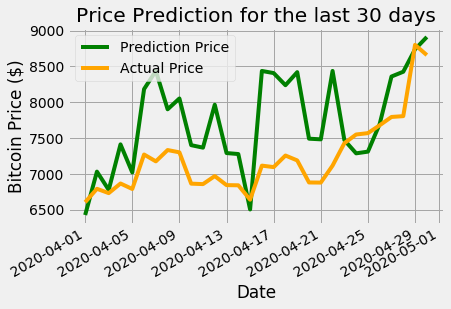

In [306]:

plt.plot(CurrentDates['Date'].tail(30), svm_prediction, color='g', label ='Prediction Price')
plt.plot(CurrentDates['Date'].tail(30), PricePrediction['Price'].tail(prediction_days),label ='Actual Price', color='orange')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price ($)')
plt.title('Price Prediction for the last 30 days')
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.gcf().autofmt_xdate()
plt.legend(loc="top left" )

plt.show()


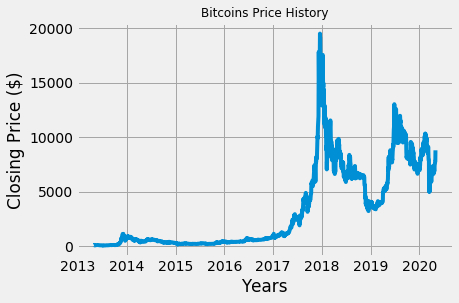

In [338]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from datetime import datetime
x = df2['Date']
y = df2['Open*']
plt.plot(x,y)
plt.title('Bitcoins Price History',fontsize=12)
plt.xlabel('Years') 
plt.ylabel('Closing Price ($)') 
plt.grid(b=True, which='both', color='0.65', linestyle='-')

plt.show()


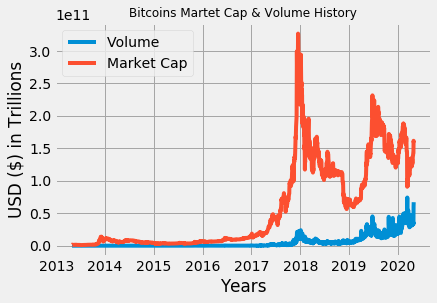

In [336]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from datetime import datetime
x = df2['Date']
y = df2['Volume']
z = df2['Market Cap']
plt.plot(x,y, label ='Volume')
plt.plot(x,z, label = "Market Cap")
plt.title('Bitcoins Martet Cap & Volume History',fontsize=12)
plt.xlabel('Years') 
plt.ylabel('USD ($) in Trillions') 
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.legend(loc="upper left")
plt.show()


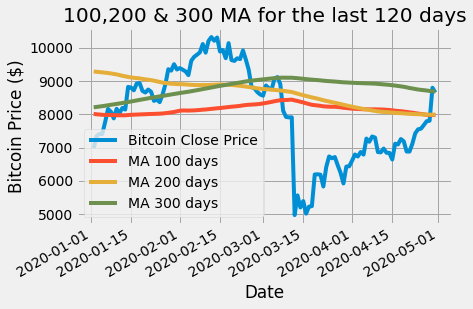

In [333]:
df2.head()
fromOldToCurrentData = pd.DataFrame() #This dataframe is for Machine Learning Model
fromOldToCurrentData['Date'] = df2['Date'].iloc[::-1].values
fromOldToCurrentData['Close'] = df2['Close**'].iloc[::-1].values 


fromOldToCurrentData['100MA'] = fromOldToCurrentData['Close'].rolling(window=100).mean() 
fromOldToCurrentData['200MA'] = fromOldToCurrentData['Close'].rolling(window=200).mean() 
fromOldToCurrentData['300MA'] = fromOldToCurrentData['Close'].rolling(window=300).mean() 
fromOldToCurrentData['400MA'] = fromOldToCurrentData['Close'].rolling(window=400).mean()

plt.plot(fromOldToCurrentData['Date'].tail(120),fromOldToCurrentData['Close'].tail(120),label= 'Bitcoin Close Price') 
plt.plot(fromOldToCurrentData['Date'].tail(120),fromOldToCurrentData['100MA'].tail(120),label= 'MA 100 days') 
plt.plot(fromOldToCurrentData['Date'].tail(120),fromOldToCurrentData['200MA'].tail(120),label= 'MA 200 days')
plt.plot(fromOldToCurrentData['Date'].tail(120),fromOldToCurrentData['300MA'].tail(120),label= 'MA 300 days') 
plt.gcf().autofmt_xdate()
plt.xlabel('Date') 
plt.ylabel('Bitcoin Price ($)') 
plt.title('100,200 & 300 MA for the last 120 days') 
plt.grid(b=True, which='both', color='0.65', linestyle='-') 
plt.legend(loc="lower left")

plt.show()

In [267]:
#******************************************#
#........First Model Done..................#
#******************************************#
#-----Data Frames-------#
#df - unsorted data from coinmarketCap
#df2 - sorted data into columns
#orginal - copy of df2
#model_data - reversed of df2 and included Violatity and Open-Close-Difference.

In [268]:
#******************************************#
#........Second Model Start................#
#******************************************#
#Simple Intro-to-Sentiment Twitter Analysis on Crypto

#{"token_type":"bearer","access_token":"AAAAAAAAAAAAAAAAAAAAALtnDAEAAAAA1ph7ACFxLP0IRqkbFOmJlaBOWCY%3DbFk8rllJxR9HGBBRTBQ2QeC05n2ojHCECGvsm9sOg9JfBwtgGK"}%
# Bearer Token AAAAAAAAAAAAAAAAAAAAALtnDAEAAAAA1ph7ACFxLP0IRqkbFOmJlaBOWCY%3DbFk8rllJxR9HGBBRTBQ2QeC05n2ojHCECGvsm9sOg9JfBwtgGK


In [269]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import re
plt.style.use('fivethirtyeight')

In [270]:

def percentage(part, whole):
    return 100 * float(part)/float(whole)

APIkey = 'Mt2dzgMAOvWqU13zmdtAxovNR'
APIsecretkey = '1CYFDynCiKvmUikEfZYffHuX1QJwqxNwko4liZmQxVXtj9N7Gk'

In [271]:
auth = tweepy.OAuthHandler(APIkey, APIsecretkey)

try:
    redirect_url = auth.get_authorization_url()
except tweepy.TweepError:
    print('Error! Failed to get request token.')
    

api = tweepy.API(auth)

#override tweepy.StreamListener to add logic to on_status
class MyStreamListener(tweepy.StreamListener):

    def on_status(self, status):
        print(status.text)
        
myStreamListener = MyStreamListener()


In [272]:
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)

In [273]:
#Clean the text
#Create a function to clean the tweets
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+','', text) #Removes @mentions
    text = re.sub(r'#', '', text) #Remove # symbol
    text = re.sub(r'RT[\s]+', '', text) #Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyper link
    
    return text

#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity ( how positive or negative text is)
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create a function to compute the negative, nuetral, and positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
relatedTweets = tweepy.Cursor(api.search, q='Bitcoin', lang = "en").items(1)
bitcoinTweets = pd.DataFrame()
list = []
count = 1
for tweet in tweepy.Cursor(api.search, q='Bitcoin', lang = "en").items(3000):
    currentTweet = tweet.text
    list.append(currentTweet)
    #print(currentTweet)
   # count = count +1
   # print()


In [340]:
bitcoinTweets['Tweets'] = list

In [341]:

bitcoinTweets['Tweets'] = bitcoinTweets['Tweets'].apply(cleanText)
bitcoinTweets
#Create two new columns
bitcoinTweets['Subjectivity']= bitcoinTweets['Tweets'].apply(getSubjectivity)
bitcoinTweets['Polarity']= bitcoinTweets['Tweets'].apply(getPolarity)

#Show the new datafram with the new columns
bitcoinTweets

,Tweets,Subjectivity,Polarity
0,A neutered regulation friendly Bitcoin is not ...,0.350000,0.287500
1,: Bitcoin is the first money in the world wher...,0.666667,0.125000
2,": Sunday Giveaway 🎁\n\nFollow ✅\nLike, RT, Tag...",0.000000,0.000000
3,Stellar XLM will have some doubters. it got co...,0.375000,0.208333
4,: $15 Bitcoin giveaway 🚀\n\n✅ Like &amp; RETWE...,0.000000,0.000000
...,...,...,...
2995,: 🚀 FREE FREEE 🏛️👉💯🙏🙏\n🎁STAY HOME HUGE PROFITS...,0.850000,0.400000
2996,"_xrp The ""what is money"" debate has raged ar...",0.000000,0.000000
2997,: FALSEFLAG \n\n() \n() \n\nBtc \nMlm \nBitcoi...,0.000000,0.000000
2998,"I care about utility, not names. So Bitcoin o...",0.500000,0.500000


In [347]:
print()
#count = 1
#for tweet in bitcoinTweets['Tweets']:
 #   print(str(count) + ') ' +tweet)
  #  count = count  + 1

In [349]:
bitcoinTweets['Analysis'] = bitcoinTweets['Polarity'].apply(getAnalysis)

#Show the dataframe
bitcoinTweets.head(7)

,Tweets,Subjectivity,Polarity,Analysis
0,A neutered regulation friendly Bitcoin is not ...,0.350000,0.287500,Positive
1,: Bitcoin is the first money in the world wher...,0.666667,0.125000,Positive
2,": Sunday Giveaway 🎁\n\nFollow ✅\nLike, RT, Tag...",0.000000,0.000000,Neutral
3,Stellar XLM will have some doubters. it got co...,0.375000,0.208333,Positive
4,: $15 Bitcoin giveaway 🚀\n\n✅ Like &amp; RETWE...,0.000000,0.000000,Neutral
5,: Episode 26: Show Host \n\nWe interview on...,0.000000,0.000000,Neutral
6,Join the Bitcoinblack airdrop and get 3600 Bit...,0.000000,0.000000,Neutral


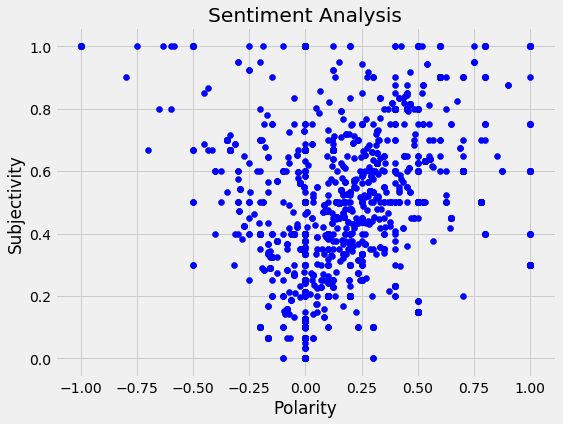

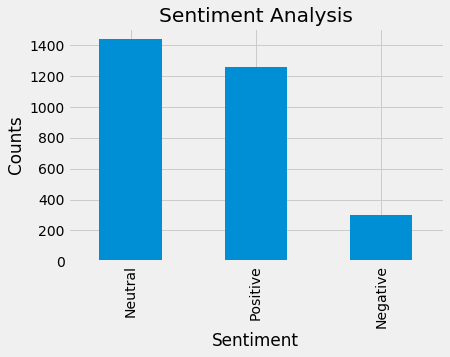

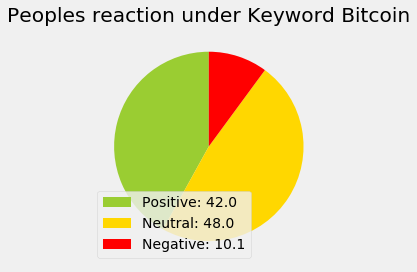

In [343]:
#Plot the polarity and subjectivity
#---------------------------------------------#
#-----------------Graph 1---------------------#
#SCATTER PLOT
plt.figure(figsize = (8,6))
for i in range(0, bitcoinTweets.shape[0]):
    plt.scatter(bitcoinTweets['Polarity'][i], bitcoinTweets['Subjectivity'][i], color = 'Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

#Show the value counts
bitcoinTweets['Analysis'].value_counts()
#---------------------------------------------#
#-----------------Graph 2---------------------#
#plot and visualize the counts BAR CHART
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
bitcoinTweets['Analysis'].value_counts().plot(kind='bar')
plt.show()
#---------------------------------------------#
#-----------------Graph 3---------------------#
# Get the percentage of positive tweets PIE CHART
btweets = bitcoinTweets[bitcoinTweets.Analysis == 'Positive']
btweets = btweets['Tweets']

ntweets = bitcoinTweets[bitcoinTweets.Analysis == 'Negative']
ntweets = ntweets['Tweets']

nutweets = bitcoinTweets[bitcoinTweets.Analysis == 'Neutral']
nutweets = nutweets['Tweets']


#print("Positive: " + str(round(btweets.shape[0]/bitcoinTweets.shape[0]*100,1)))
#print("Negative: " + str(round(ntweets.shape[0]/bitcoinTweets.shape[0]*100,1)))
#print("Neutral: " + str(round(nutweets.shape[0]/bitcoinTweets.shape[0]*100,1)))

positive = ("Positive: " + str(round(btweets.shape[0]/bitcoinTweets.shape[0]*100,1)))
neutral = ("Neutral: " + str(round(nutweets.shape[0]/bitcoinTweets.shape[0]*100,1)))
negative = ("Negative: " + str(round(ntweets.shape[0]/bitcoinTweets.shape[0]*100,1)))

labels = [positive, neutral, negative]

postivenum = round(btweets.shape[0]/bitcoinTweets.shape[0]*100,1)
nuetralnum = round(nutweets.shape[0]/bitcoinTweets.shape[0]*100,1)
negativenum = round(ntweets.shape[0]/bitcoinTweets.shape[0]*100,1)
sizes = [postivenum, nuetralnum, negativenum]
colors = ['yellowgreen', 'gold', 'red']
patches, text = plt.pie(sizes, colors = colors, startangle=90)
plt.title('Peoples reaction under Keyword Bitcoin')
plt.legend(patches, labels)
plt.tight_layout()
plt.show()

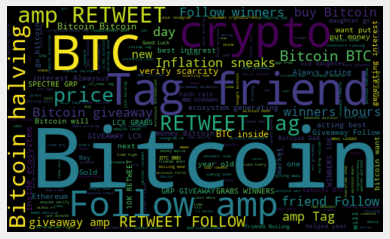

In [344]:
allWords = ' '.join([tweets for tweets in bitcoinTweets['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud,interpolation = "bilinear")
plt.axis('off')
plt.show()

In [307]:
df2.head()

,Date,Open*,High*,Low,Close**,Volume,Market Cap
0,2020-04-30,8797.67,9440.65,8533.26,8658.55,66964629541,1.589221e+11
1,2020-04-29,7806.71,8871.75,7786.05,8801.04,60201052203,1.615225e+11
2,2020-04-28,7796.97,7814.53,7730.81,7807.06,33187959921,1.432663e+11
3,2020-04-27,7679.42,7795.60,7679.42,7795.60,36162144725,1.430410e+11
4,2020-04-26,7570.14,7700.59,7561.41,7679.87,33070154491,1.409039e+11
